# Workshop 4 : Model Training, Management, and Deployment

Before going through model training you need to conduct data preparation, and feature engineering to increase the chances to get good performance.

VerticaPy provides [`AutoML`](https://www.vertica.com/python/documentation_last/delphi/automl/) a powerful tool to have reasonable idea which model has more probability to be the good choice for your task.

<div class="alert alert-block alert-info">
    <b>Important:</b> <b>AutoML</b> conduct basic data preparation on the variables as encoding and it choose the type of machine learning suitable for the case, In addition it perform search grid on the hyper-parameters of the model to the choose the best combination</div>
    
Let's try this tool on titanic dataset.

In [7]:
# Connect with the database
vp.connect("tutorial_connection")
# Create VerticaPy schema for native verticapy models
vp.create_verticapy_schema()

Starting AutoML



  0%|          | 0/2 [00:00<?, ?it/s]


Testing Model - LogisticRegression



  0%|          | 0/4 [00:00<?, ?it/s]

Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'none', 'solver': 'bfgs'}; Test_score: 0.0380900838282177; Train_score: 0.0353921904023254; Time: 25.385390917460125;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l1', 'solver': 'cgd', 'C': 1.0}; Test_score: 0.301029995663981; Train_score: 0.301029995663981; Time: 0.9341668287913004;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l2', 'solver': 'bfgs', 'C': 1.0}; Test_score: 0.046544304566680836; Train_score: 0.03408766972128563; Time: 29.342151244481403;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'enet', 'solver': 'cgd', 'C': 1.0, 'l1_ratio': 0.5}; Test_score: 0.301029995663981; Train_score: 0.301029995663981; Time: 1.2453850110371907;
Grid Search Selected Model
LogisticRegression; Parameters: {'solver': 'bfgs', 'penalty': 'none', 'max_iter': 100, 'tol': 1e-06}; Test_score: 0.0380900838282177;

  0%|          | 0/3 [00:00<?, ?it/s]

Model: NaiveBayes; Parameters: {'alpha': 0.01}; Test_score: 0.056396473254981164; Train_score: 0.06610518619907543; Time: 0.5716357231140137;
Model: NaiveBayes; Parameters: {'alpha': 1.0}; Test_score: 0.15802382201181323; Train_score: 0.1098393856769955; Time: 0.4771114985148112;
Model: NaiveBayes; Parameters: {'alpha': 10.0}; Test_score: 0.10095126469293617; Train_score: 0.10229042548056853; Time: 0.4602092107137044;
Grid Search Selected Model
NaiveBayes; Parameters: {'alpha': 0.01, 'nbtype': 'auto'}; Test_score: 0.056396473254981164; Train_score: 0.06610518619907543; Time: 0.5716357231140137;
Final Model

LogisticRegression; Best_Parameters: {'solver': 'bfgs', 'penalty': 'none', 'max_iter': 100, 'tol': 1e-06}; Best_Test_score: 0.0380900838282177; Train_score: 0.0353921904023254; Time: 25.385390917460125;


Starting Stepwise


  0%|          | 0/16 [00:00<?, ?it/s]

[Model 0] aic: -4784.370676557166; Variables: ['"age"', '"boat_8"', '"boat_5"', '"boat_3"', '"boat_14"', '"boat_10"', '"boat_C"', '"boat_4"', '"boat_15"', '"boat_13"', '"fare"', '"pclass"', '"boat_Others"', '"sex_male"', '"sex_female"', '"boat_NULL"']
[Model 1] aic: -4784.356664365212; (-) Variable: "age"
[Model 2] aic: -4786.4124690202425; (-) Variable: "boat_8"
[Model 3] aic: -4788.474467685527; (-) Variable: "boat_5"
[Model 4] aic: -4790.473818020447; (-) Variable: "boat_3"
[Model 5] aic: -4797.005781440231; (-) Variable: "boat_14"
[Model 6] aic: -4798.809002956914; (-) Variable: "boat_10"
[Model 7] aic: -4801.228069437835; (-) Variable: "boat_C"
[Model 8] aic: -4803.503414369809; (-) Variable: "boat_4"
[Model 9] aic: -4803.352282665415; (-) Variable: "boat_15"
[Model 10] aic: -4804.972590298727; (-) Variable: "boat_13"
[Model 11] aic: -4806.983428493669; (-) Variable: "sex_male"
Selected Model

[Model 11] aic: -4806.983428493669; Variables: ['"fare"', '"pclass"', '"boat_Others"', '

,model_type,,avg_score,avg_train_score,avg_time,score_std,score_train_std,
1,LogisticRegression,,0.0380900838282177,0.0353921904023254,25.385390917460125,0.008960227349287572,0.0013342540059988776,""" readonly>"
2,LogisticRegression,,0.046544304566680836,0.03408766972128563,29.342151244481403,0.007579934072131855,0.003619365044283265,""" readonly>"
3,NaiveBayes,,0.056396473254981164,0.06610518619907543,0.5716357231140137,0.019922461561099752,0.00972425916850598,""" readonly>"
4,NaiveBayes,,0.10095126469293617,0.10229042548056853,0.4602092107137044,0.016654355324469003,0.003013144526353186,""" readonly>"
5,NaiveBayes,,0.15802382201181323,0.1098393856769955,0.4771114985148112,0.1255720909292151,0.062360262934825834,""" readonly>"
6,LogisticRegression,,0.301029995663981,0.301029995663981,0.9341668287913004,0.0,0.0,""" readonly>"
7,LogisticRegression,,0.301029995663981,0.301029995663981,1.2453850110371907,0.0,0.0,""" readonly>"

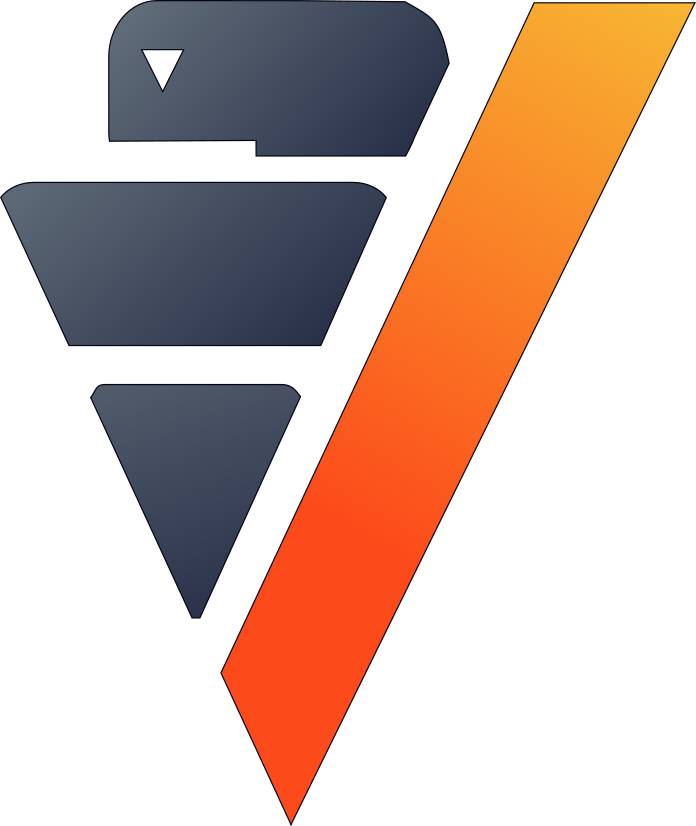

In [1]:
from verticapy.learn.delphi import AutoML

model = AutoML("titanic_autoML")
model.fit("public.titanic", 
          X = ["boat", "age", "fare", "pclass", "sex"],
          y = "survived")

<AxesSubplot:xlabel='n_features', ylabel='aic'>

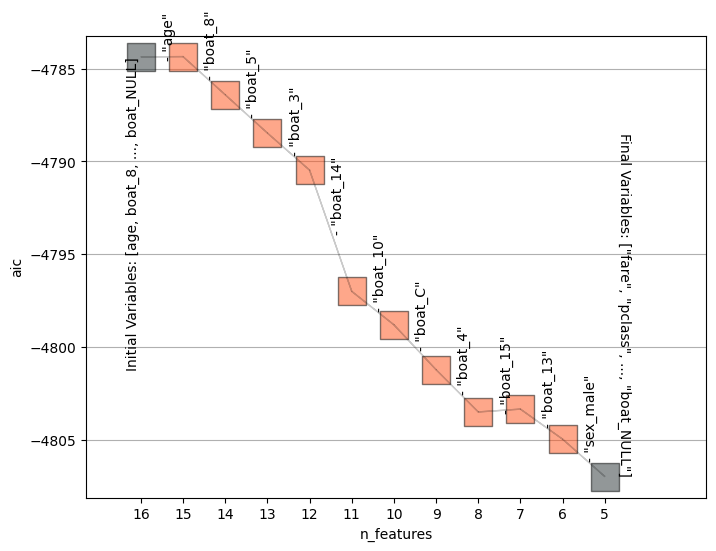

In [2]:
model.plot("stepwise")

<AxesSubplot:xlabel='time', ylabel='score'>

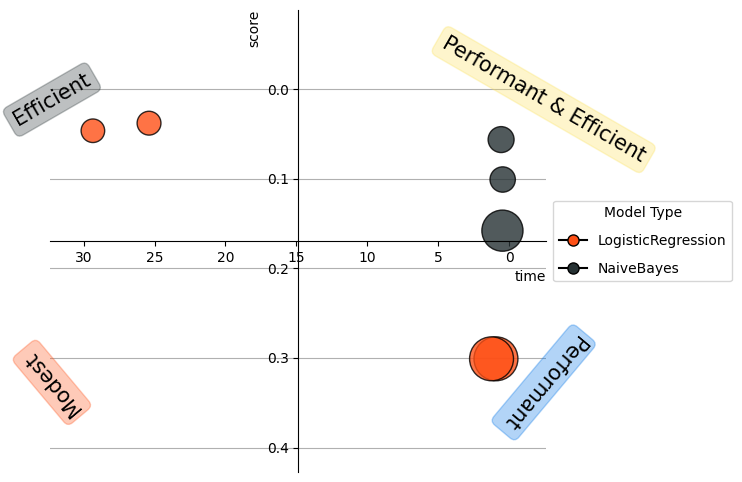

In [3]:
model.plot()

In general, conduction manual data preparation and features engineering leads to better results.
In this section we will not focus on data preparation because it's out of our scope (please refer to the previous workshops)

In [36]:
from verticapy.learn.linear_model import LogisticRegression
import verticapy as vp
import matplotlib.pyplot as plt
churn = vp.vDataFrame("public.churn")

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

,123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0

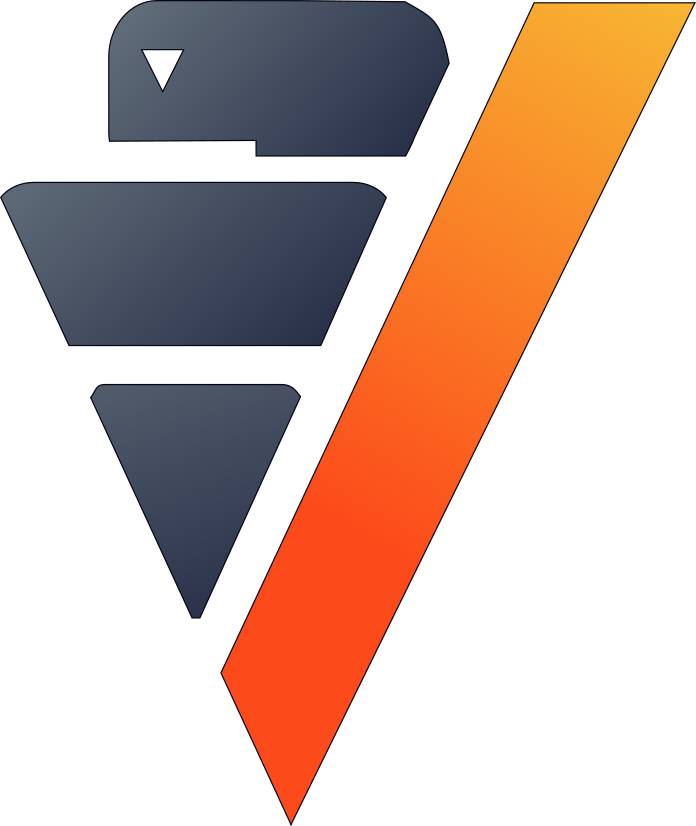

In [22]:
for column in ["DeviceProtection", 
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes", 1, 0)
churn.one_hot_encode().drop(["customerID", 
                             "gender", 
                             "Contract", 
                             "PaymentMethod", 
                             "InternetService"])

In [23]:
train, test = churn.train_test_split(test_size = 0.2, 
                                     random_state = 0)

##### Classification 

,value
auc,0.8381020408163263
prc_auc,0.6245816914457993
accuracy,0.8
log_loss,0.173912261180483
precision,0.6143790849673203
recall,0.5371428571428571
f1_score,0.573170731707317
mcc,0.44504595397807467
informedness,0.4247619047619047
markedness,0.4662986462104648

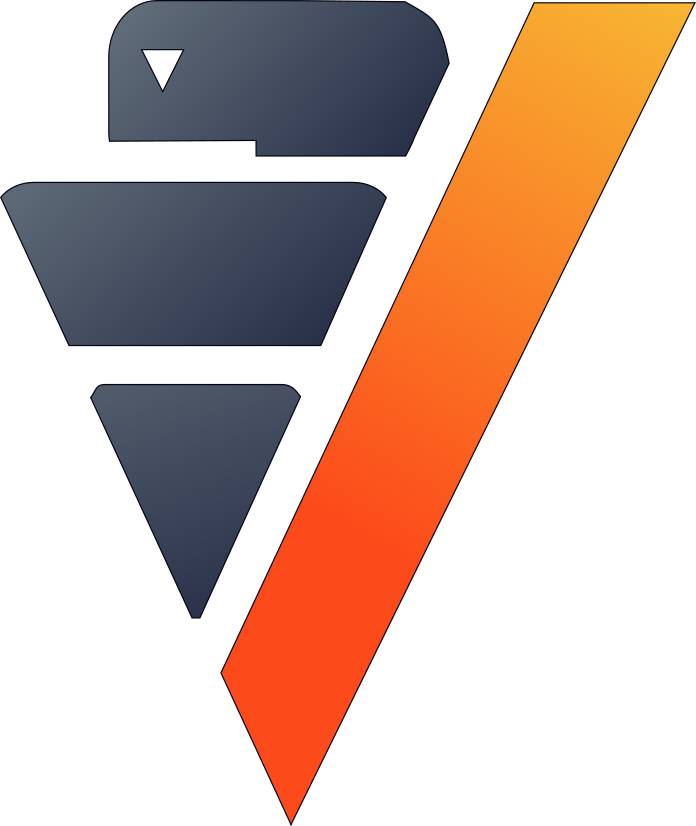

In [24]:
model = LogisticRegression("churn_model", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")
model.fit(train, 
          churn.get_columns(exclude_columns = ["churn"]), 
          'churn',
          test)
model.classification_report()

,importance,sign
,29.1,-1
,17.6,1
,8.24,1
,6.9,1
,6.66,1
,5.33,-1
,3.71,1
,3.52,1
,3.29,-1
,2.88,1

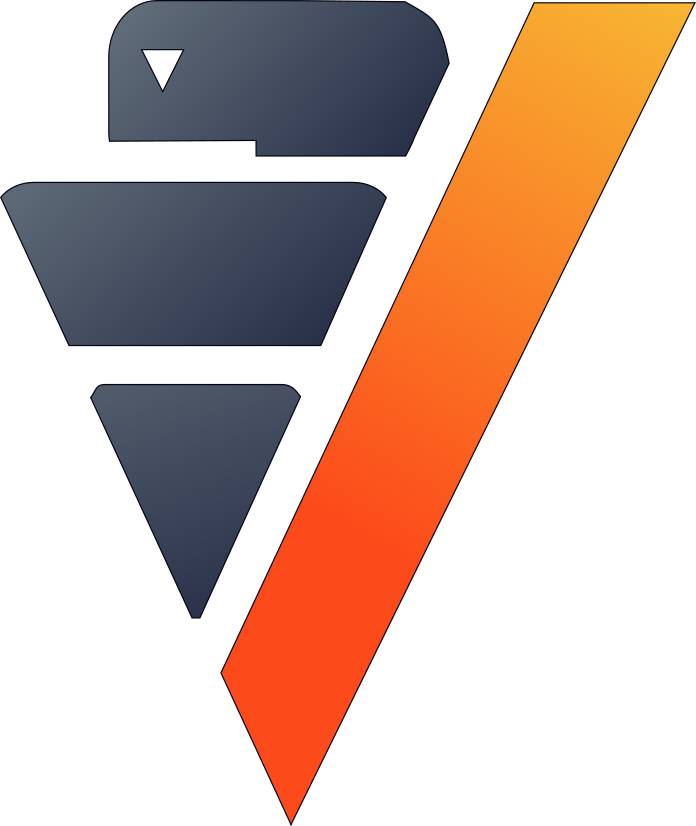

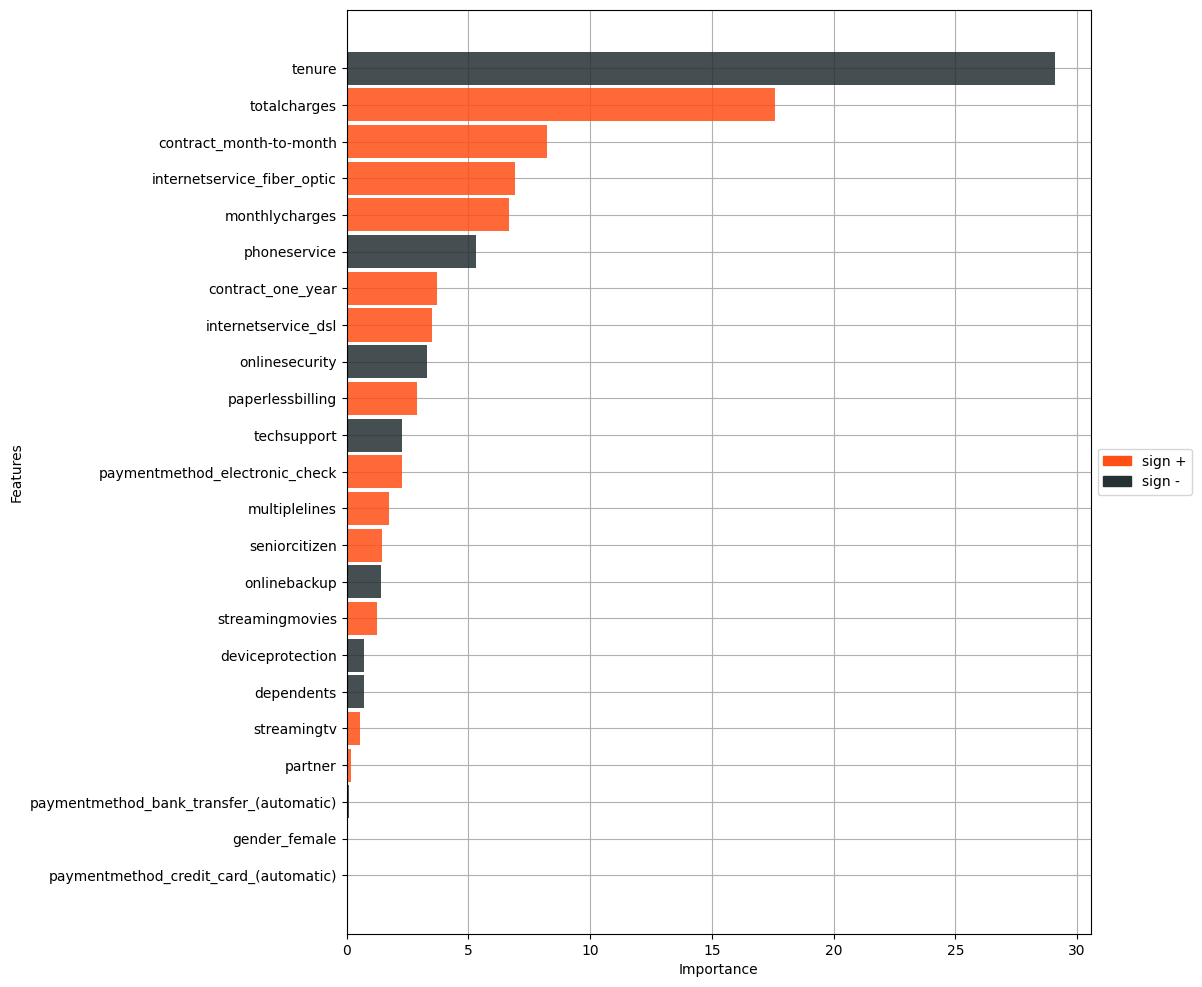

In [25]:
model.features_importance()

##### Regression

In [27]:
from verticapy.learn.ensemble import RandomForestRegressor
model = RandomForestRegressor(name = "public.rf_churn",
                              n_estimators = 20,
                              max_features = "auto",
                              max_leaf_nodes = 32, 
                              sample = 0.7,
                              max_depth = 3,
                              min_samples_leaf = 5,
                              min_info_gain = 0.0,
                              nbins = 32)
model.fit(train,
churn.get_columns(exclude_columns = ["totalcharges"]), 
          'totalcharges',
          test)




call_string
SELECT rf_regressor('public.rf_churn', '"public"."_verticapy_tmp_view_dbadmin_249032_9658341944_"', 'totalcharges', '"SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "Churn", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check"' USING PARAMETERS exclude_columns='', ntree=20, mtry=8, sampling_size=0.7, max_depth=3, max_breadth=32, min_leaf_size=5, min_info_gain=0, nbins=32);

details
               predictor               |      type      
---------------------------------------+----------------
             seniorcitizen             |      int       
                partner                |      int       
            

,value
explained_variance,0.926982649378608
max_error,2012.29628036053
median_absolute_error,369.262665015086
mean_absolute_error,476.149925528066
mean_squared_error,376579.957950416
root_mean_squared_error,613.6611100195416
r2,0.926964140697743
r2_adj,0.925743337816964
aic,18023.312672816846
bic,18148.3014059186

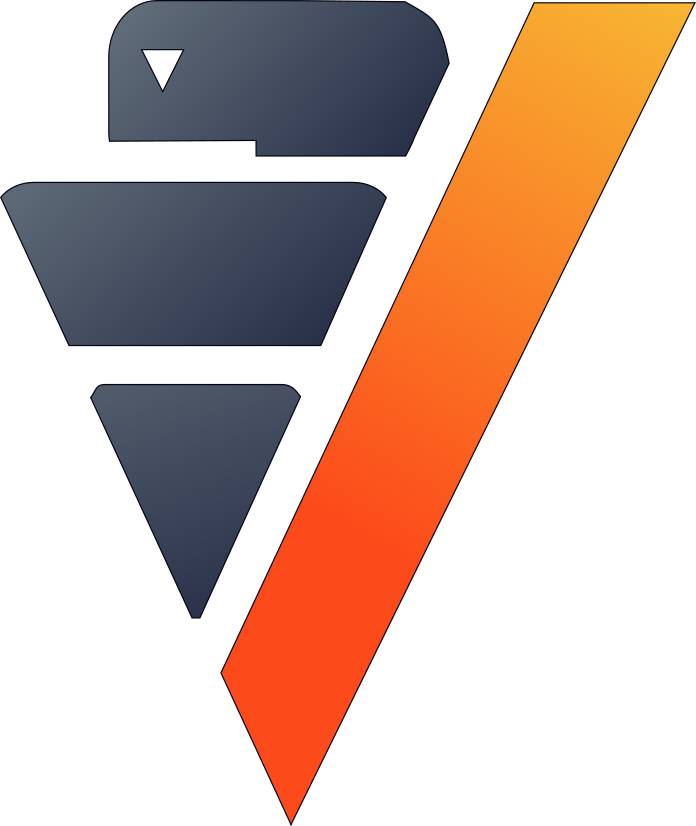

In [28]:
model.report()

##### Clustering

In [31]:
from verticapy.learn.cluster import KMeans
model = KMeans(name = "public.kmeans_iris",
               n_cluster = 8,
               init = "kmeanspp",
               max_iter = 300,
               tol = 1e-4)
model.fit(churn,
          churn.get_columns(exclude_columns = ["churn"]))



centers
seniorcitizen|partner |dependents| tenure |phoneservice|multiplelines|onlinesecurity|onlinebackup|deviceprotection|techsupport|streamingtv|streamingmovies|paperlessbilling|monthlycharges|totalcharges|gender_female|internetservice_dsl|internetservice_fiber_optic|contract_month-to-month|contract_one_year|paymentmethod_bank_transfer_(automatic)|paymentmethod_credit_card_(automatic)|paymentmethod_electronic_check
-------------+--------+----------+--------+------------+-------------+--------------+------------+----------------+-----------+-----------+---------------+----------------+--------------+------------+-------------+-------------------+---------------------------+-----------------------+-----------------+---------------------------------------+-------------------------------------+------------------------------
   0.12764   | 0.44949|  0.33986 |27.51605|   0.89898  |   0.30854   |    0.15740   |   0.17541  |     0.18716    |  0.15740  |  0.22631  |    0.23258    |     0.52

In [32]:
churn_clustered = model.predict(churn,
                               X=churn.get_columns(exclude_columns = ["churn"]),
                               name="cluster")

,123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool,123clusterInteger
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0,0
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0,5
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1,5
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1,0
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0,5
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0,5
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0,6
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0,4
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1,5
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0,1

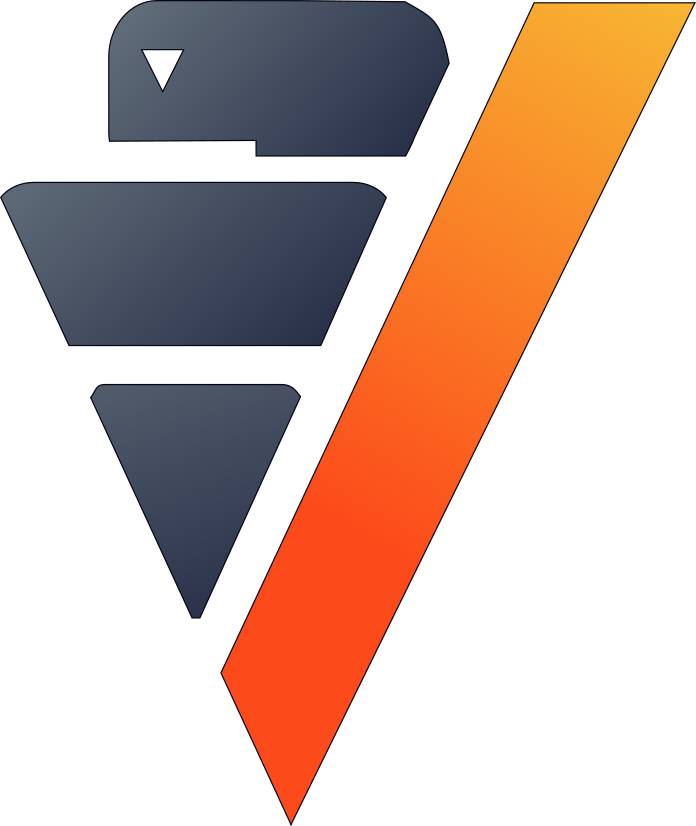

In [33]:
churn_clustered

<AxesSubplot:xlabel='"MonthlyCharges"', ylabel='"TotalCharges"'>

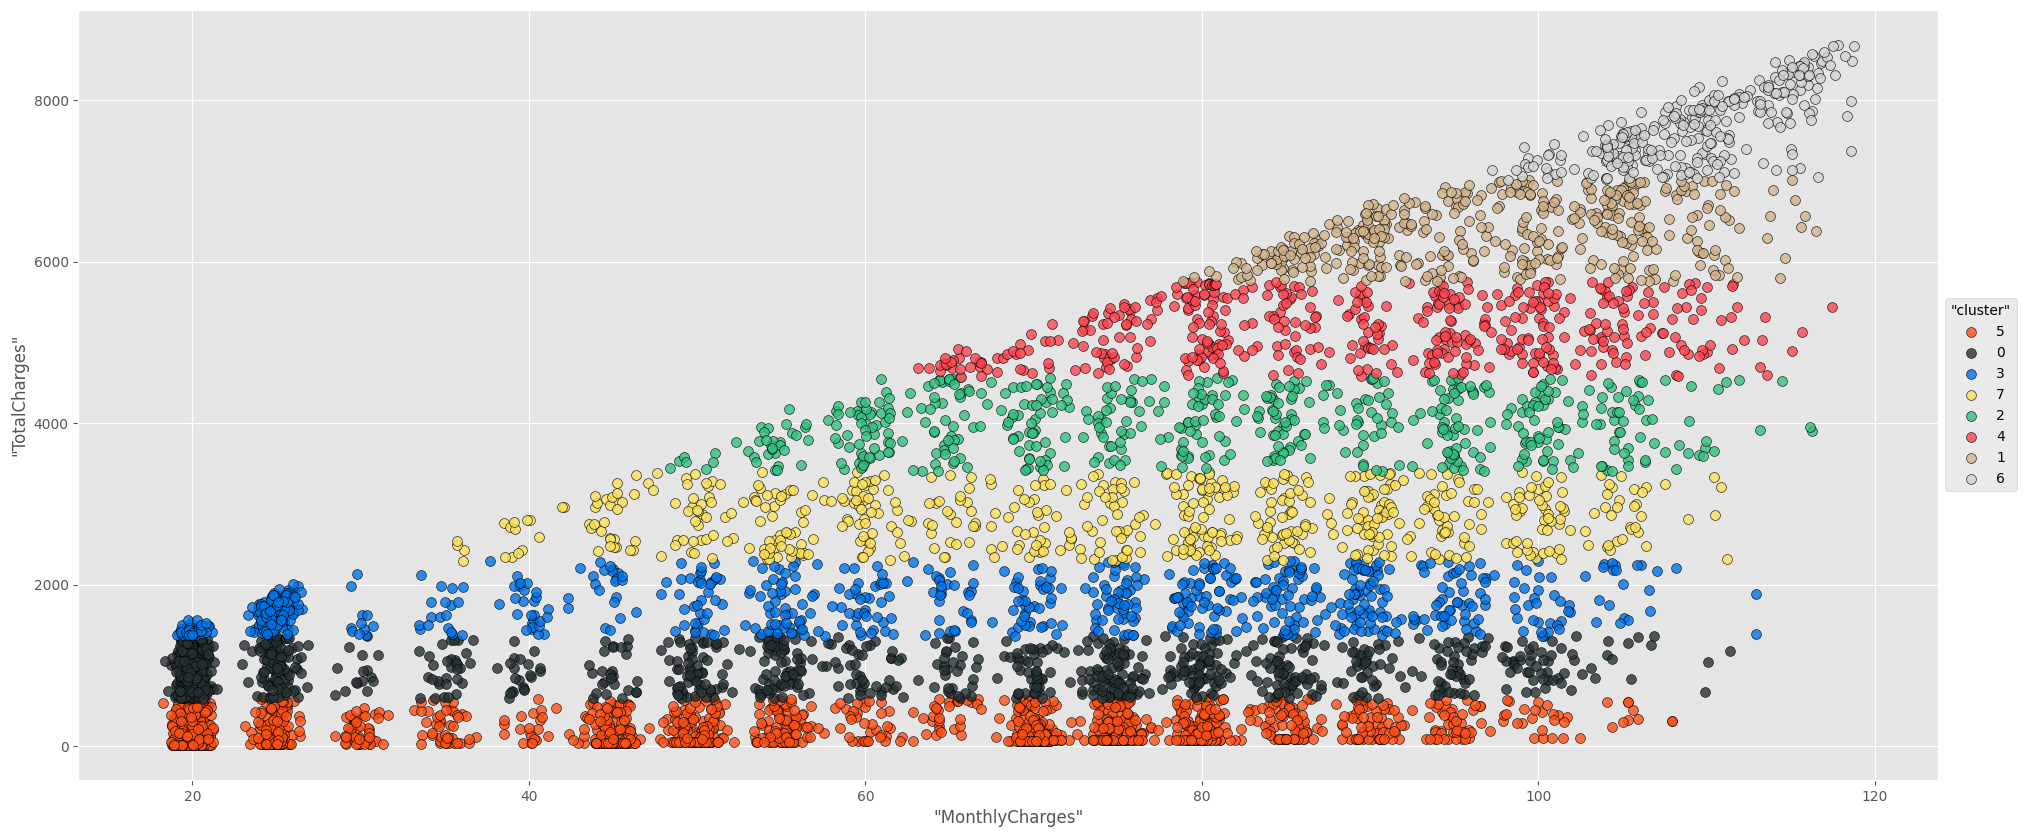

In [39]:
# you can chooss the style
plt.style.use('ggplot')
# set the axis
fig, ax = plt.subplots(figsize=(30, 10))
# Scatter plot
churn_clustered.scatter(['MonthlyCharges', 'TotalCharges'],
                   catcol="cluster",
                   max_cardinality=10,
                   cat_priority=[],
                   # True: aggregate the small representavive set, False will not aggregate them and not plot them
                   with_others=False,
                   dimensions=None,
                   ax=ax,)